## ML_SP22_RE_4 
### Due Date: 03/25 before Mid-night
### Linear Regression, One-hot encoding and K-fold cross validation

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This review exercise is on building a Linear Regression model, practice k-fold cross validation and one-hot encoding 

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [53]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [54]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

***Type your code here***

In [64]:
Xarray = housing['Price'].values
Yarray = housing['Income'].values

In [65]:
type(Xarray)
Xarray

array([1059033.558, 1505890.915, 1058987.988, ..., 1030729.583,
       1198656.872, 1298950.48 ])

In [66]:
X = Xarray.reshape(-1, 2)
print(X.shape)
X

(2500, 2)


array([[1059033.558 , 1505890.915 ],
       [1058987.988 , 1260616.807 ],
       [ 630943.4893, 1068138.074 ],
       ...,
       [ 905354.914 , 1060193.786 ],
       [1482617.729 , 1030729.583 ],
       [1198656.872 , 1298950.48  ]])

In [67]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)
X

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

In [68]:
model1 = LinearRegression()
model1.fit(X, Y)
print(model1.intercept_)
print(model1.coef_)

[44793.26675365]
[[0.0193088]]


In [69]:
Y_pred = model1.predict(X)
Y_pred

array([[65241.93199808],
       [73870.21052266],
       [65241.05209615],
       ...,
       [64695.41625692],
       [67937.89039027],
       [69874.43942657]])

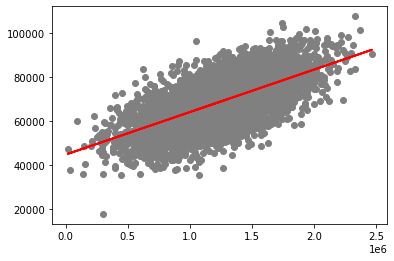

In [70]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)
print(model1.intercept_)
print(model1.coef_)

[44706.29640028]
[[0.01936555]]
[44793.26675365]
[[0.0193088]]


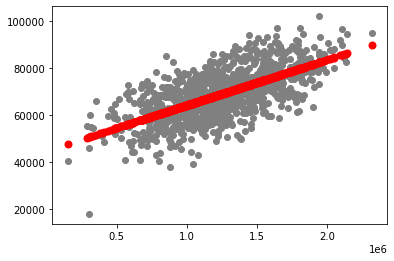

In [76]:
Y_pred = model2.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [77]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 67314017.38154754
R-squared: 0.4005188171698285


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
model3 = LinearRegression()
model3.fit(X_train, Y_train)
print(model3.intercept_)
print(model3.coef_)

[44829.41300522]
[[0.01934156]]


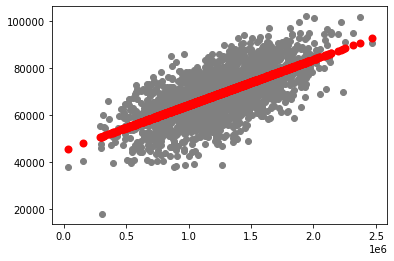

In [79]:
Y_pred = model3.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [80]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 65604783.53108339
R-squared: 0.41801635361114065


In [81]:
import random
for i in range(10):
    print(random.randint(1, 1000))

824
471
567
899
361
669
600
170
463
794


In [82]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.37253539481143527,  Slope: [[0.01944824]], Intercept: [44589.2084563],  
Trial 1, R-squared: 0.4106996521343659,  Slope: [[0.01916766]], Intercept: [44894.55755276],  
Trial 2, R-squared: 0.3721814567799714,  Slope: [[0.0195783]], Intercept: [44508.66272481],  
Trial 3, R-squared: 0.3912699849618708,  Slope: [[0.01926287]], Intercept: [44900.93055065],  
Trial 4, R-squared: 0.42381769184264306,  Slope: [[0.01934431]], Intercept: [44790.26985695],  
Trial 5, R-squared: 0.4425122481174534,  Slope: [[0.01930504]], Intercept: [44811.31053548],  
Trial 6, R-squared: 0.40502083050772564,  Slope: [[0.01919816]], Intercept: [44868.89027082],  
Trial 7, R-squared: 0.401426553924379,  Slope: [[0.01957677]], Intercept: [44440.05681354],  
Trial 8, R-squared: 0.4215437113118008,  Slope: [[0.01913097]], Intercept: [44929.10580632],  
Trial 9, R-squared: 0.40816483573778317,  Slope: [[0.0191967]], Intercept: [44992.56289067],  


In [83]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.413121
1,1,0.413354
2,2,0.398002
3,3,0.385212
4,4,0.420327
5,5,0.414941
6,6,0.393957
7,7,0.423814
8,8,0.382422
9,9,0.399781


0.4044931619005371


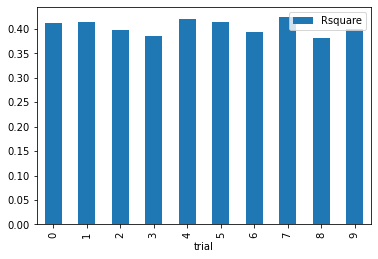

In [85]:
rdf.plot.bar(x='trial', y='Rsquare')
print(rdf['Rsquare'].mean())

***Pick an additional variable to build a two-factors linear regression model***


In [86]:
X = housing[['Price','Income']].values.reshape(-1, 2)
Y = housing['HouseAge'].values.reshape(-1, 1) # it's secon highest correlation
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [193]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[ 1588.98044893  -792.02514655 10068.80634372]
82602.43156126663


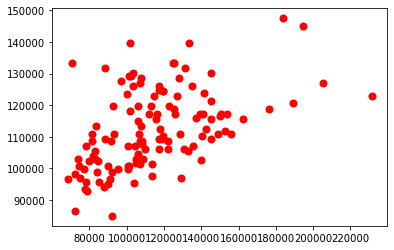

In [194]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [195]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.23418558432760228


Trial 0, R-squared: 0.7732600223220505,  Slope: [[0.91595999]], Intercept: [-2.72501629],  
Trial 1, R-squared: 0.7340042727232778,  Slope: [[0.93414419]], Intercept: [-3.12171868],  
Trial 2, R-squared: 0.8289476753624851,  Slope: [[0.91328068]], Intercept: [-2.72126866],  
Trial 3, R-squared: 0.8510261115458121,  Slope: [[0.90258511]], Intercept: [-2.6898619],  
Trial 4, R-squared: 0.8192849931746449,  Slope: [[0.91103978]], Intercept: [-2.72902372],  
Trial 5, R-squared: 0.8535080671173718,  Slope: [[0.9124534]], Intercept: [-2.72900985],  
Trial 6, R-squared: 0.8457170945279069,  Slope: [[0.90030104]], Intercept: [-2.44804941],  
Trial 7, R-squared: 0.8370320996066248,  Slope: [[0.91221815]], Intercept: [-2.65278101],  
Trial 8, R-squared: 0.7811330501384148,  Slope: [[0.93046577]], Intercept: [-3.12174006],  
Trial 9, R-squared: 0.8406763796223509,  Slope: [[0.91158951]], Intercept: [-2.81321289],  


<AxesSubplot:xlabel='trial'>

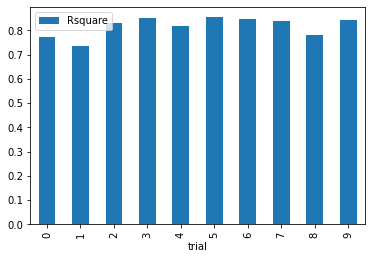

In [196]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [197]:
print(rdf['Rsquare'].mean())

0.8164589766140941


### Now load the Salary data set

In [198]:
# Load the dataset
df = pd.read_csv("Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [199]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [200]:
df.isnull().any() 
# or
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

In [201]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(399, 6)

<AxesSubplot:xlabel='Salary'>

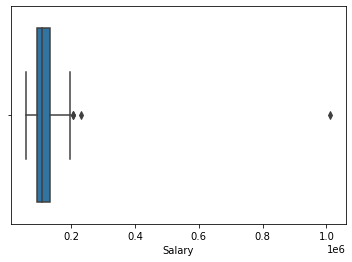

In [202]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

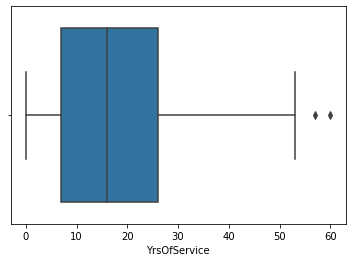

In [237]:
sns.boxplot(x=df['YrsOfService'])

In [238]:
# remove un-reasonable data, 
df = df[df['YrsOfService'] < 70]
df = df[df['Salary'] < 400000]
df.shape

(397, 7)

<AxesSubplot:xlabel='Salary'>

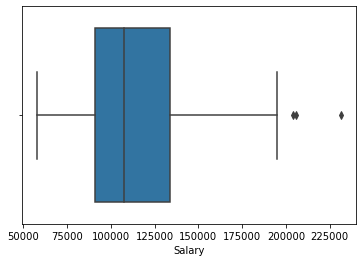

In [239]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

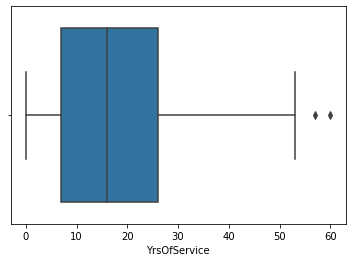

In [240]:
sns.boxplot(x=df['YrsOfService'])

In [241]:
df.shape

(397, 7)

In [242]:
df.tail()

,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,398,Prof,A,33.0,30.0,Male,103106
393,399,Prof,A,31.0,19.0,Male,150564
394,400,Prof,A,42.0,25.0,Male,101738
395,401,Prof,A,25.0,15.0,Male,95329
396,402,AsstProf,A,8.0,4.0,Male,81035


***In general it is a good idea to reset the index after we remove rows***

In [243]:
df = df.reset_index()
df.tail()

,level_0,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,392,398,Prof,A,33.0,30.0,Male,103106
393,393,399,Prof,A,31.0,19.0,Male,150564
394,394,400,Prof,A,42.0,25.0,Male,101738
395,395,401,Prof,A,25.0,15.0,Male,95329
396,396,402,AsstProf,A,8.0,4.0,Male,81035


### Now we are ready to use this data to build model ###

1. Separate numerical features from categorical features
2. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
3. Check if the model pass cross validation
4. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable
to build a second model.
5. Comment on if the model improve or not

***Type your code here***

In [244]:
# ignore longitude and latitude
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']
#categorical_features = ['....']'
numerical_df = df[numerical_features]
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [245]:
target_variable = 'Salary'
categorical_geatures = ['YrsSincePhd', 'YrsOfService']
categorical_features =['Rank', 'Discipline','Sex']
numerical_df = df[numerical_features]
numerical_df.head()


,YrsSincePhd,YrsOfService,Salary
0,19.0,18.0,139750
1,20.0,16.0,173200
2,4.0,3.0,79750
3,45.0,39.0,115000
4,40.0,41.0,141500


In [246]:
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [247]:
categorical_df = df[categorical_features]
categorical_df.head()

,Rank,Discipline,Sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male


In [248]:
df.describe()

,level_0,index,YrsSincePhd,YrsOfService,Salary
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,198.000000,201.926952,22.259446,17.556675,113656.375315
std,114.748275,116.632645,12.870987,12.970633,30240.786440
min,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,99.000000,103.000000,12.000000,7.000000,91000.000000
50%,198.000000,203.000000,21.000000,16.000000,107300.000000
75%,297.000000,302.000000,32.000000,26.000000,134000.000000
max,396.000000,402.000000,56.000000,60.000000,231545.000000


In [249]:
num_feature_df = numerical_df.drop('Salary', axis=1)
num_feature_df.head()

,YrsSincePhd,YrsOfService
0,19.0,18.0
1,20.0,16.0
2,4.0,3.0
3,45.0,39.0
4,40.0,41.0


In [250]:
df.head()

,level_0,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,0,0,Prof,B,19.0,18.0,Male,139750
1,1,1,Prof,B,20.0,16.0,Male,173200
2,2,2,AsstProf,B,4.0,3.0,Male,79750
3,3,3,Prof,B,45.0,39.0,Male,115000
4,4,4,Prof,B,40.0,41.0,Male,141500


In [251]:
numerical_df = df[numerical_features]

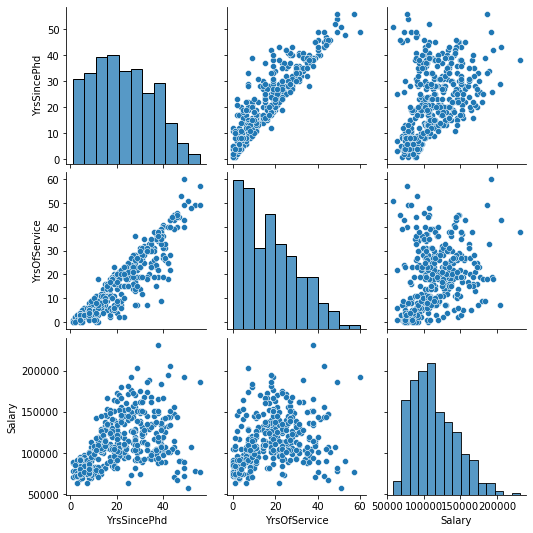

In [252]:
sns.pairplot(numerical_df)

In [253]:
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>

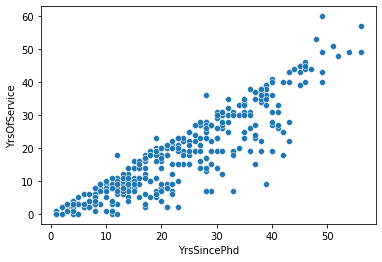

In [254]:
sns.scatterplot(x='YrsSincePhd', y='YrsOfService', data=numerical_df)

In [255]:
X = numerical_df['YrsSincePhd'].values.reshape(-1, 1)
Y = numerical_df['YrsOfService'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

[-2.8625528]
[[0.91525031]]
R-squared: 0.8692892608349068


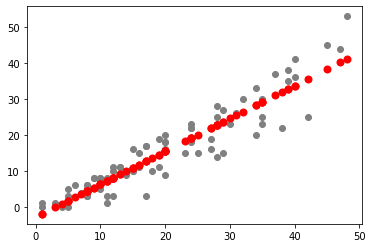

In [256]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [257]:
df['Rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [258]:
categorical_df = df[categorical_features]
categorical_df.head()

,Rank,Discipline,Sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male


In [259]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
salary_cat_1hot = cat_encoder.fit_transform(categorical_df)
salary_cat_1hot

<397x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1191 stored elements in Compressed Sparse Row format>

In [260]:
salary_cat_1hot.toarray()

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [261]:
cat_encoder.categories_ #error so i will do seperatly

[array(['AssocProf', 'AsstProf', 'Prof'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [262]:
rank = pd.get_dummies(df['Rank'],drop_first=True)
rank

,AsstProf,Prof
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
392,0,1
393,0,1
394,0,1
395,0,1


In [263]:
combine_df = pd.concat([numerical_df[['Salary', 'YrsSincePhd','YrsOfService']], rank ], axis=1)
combine_df.head()

,Salary,YrsSincePhd,YrsOfService,AsstProf,Prof
0,139750,19.0,18.0,0,1
1,173200,20.0,16.0,0,1
2,79750,4.0,3.0,1,0
3,115000,45.0,39.0,0,1
4,141500,40.0,41.0,0,1


In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(combine_df.drop('YrsOfService',axis=1), 
                                                    combine_df['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-1.4269258315644855
[-2.29797540e-05  9.79234378e-01  5.09491549e-01 -6.18459986e-01]
R-squared: 0.8095411844343028


In [265]:
disc = pd.get_dummies(df['Discipline'],drop_first=True)
disc

,B
0,1
1,1
2,1
3,1
4,1
...,...
392,0
393,0
394,0
395,0


In [266]:
combine_df = pd.concat([numerical_df[['Salary', 'YrsSincePhd','YrsOfService']], disc ], axis=1)
combine_df.head()

,Salary,YrsSincePhd,YrsOfService,B
0,139750,19.0,18.0,1
1,173200,20.0,16.0,1
2,79750,4.0,3.0,1
3,115000,45.0,39.0,1
4,141500,40.0,41.0,1


In [267]:
X_train, X_test, Y_train, Y_test = train_test_split(combine_df.drop('YrsOfService',axis=1), 
                                                    combine_df['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-0.984955995631914
[-3.43478223e-05  9.74254634e-01  1.17073560e+00]
R-squared: 0.8146626719970206


In [268]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex

,Male
0,1
1,1
2,1
3,1
4,1
...,...
392,1
393,1
394,1
395,1


In [269]:
combine_df = pd.concat([numerical_df[['Salary', 'YrsSincePhd','YrsOfService']], sex ], axis=1)
combine_df.head()

,Salary,YrsSincePhd,YrsOfService,Male
0,139750,19.0,18.0,1
1,173200,20.0,16.0,1
2,79750,4.0,3.0,1
3,115000,45.0,39.0,1
4,141500,40.0,41.0,1


In [270]:
X_train, X_test, Y_train, Y_test = train_test_split(combine_df.drop('YrsOfService',axis=1), 
                                                    combine_df['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-1.3522415844111002
[-2.99645519e-05  9.57338589e-01  9.89087491e-01]
R-squared: 0.810550035654877


In [ ]:
#improved